<a href="https://colab.research.google.com/github/SwaroopKrishna2002/Football-Player-Tracking/blob/main/Football_Player_and_ball_tracking_using_YOLOv5_and_ByteTrack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Football Player Tracking using YOLOv5 and ByteTrack

#Setup - GPU, working Directory and downloading the dataset

In [ ]:
!nvidia-smi

Fri Aug 25 09:29:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
!pwd

/content


Setting Working Directory

In [ ]:
%cd /content/drive/MyDrive/Football

/content/drive/MyDrive/Football


# Downloading dataset from Kaggle (DFL-Bundesliga Data Shootout)


Used the Kaggle-API method here

In [ ]:
!pip install kaggle --upgrade --quiet

In [ ]:
from getpass import getpass

In [ ]:
os.environ['KAGGLE_USERNAME'] = getpass('Enter KAGGLE_USERNAME secret value: ')
os.environ['KAGGLE_KEY'] = getpass('Enter KAGGLE_KEY secret value: ')

Enter KAGGLE_USERNAME secret value: ··········
Enter KAGGLE_KEY secret value: ··········


In [ ]:
!kaggle competitions files -c dfl-bundesliga-data-shootout | grep clips | head -10

clips/0a2d9b_6.mp4      20MB  2022-07-29 14:23:09  
clips/08fd33_7.mp4      18MB  2022-07-29 14:23:09  
clips/08fd33_4.mp4      19MB  2022-07-29 14:23:09  
clips/08fd33_9.mp4      18MB  2022-07-29 14:23:09  
clips/0a2d9b_3.mp4      18MB  2022-07-29 14:23:09  
clips/0a2d9b_9.mp4      18MB  2022-07-29 14:23:09  
clips/08fd33_1.mp4      18MB  2022-07-29 14:23:09  
clips/08fd33_6.mp4      19MB  2022-07-29 14:23:09  
clips/08fd33_5.mp4      18MB  2022-07-29 14:23:09  
clips/0a2d9b_0.mp4      20MB  2022-07-29 14:23:09  


In [ ]:
!kaggle competitions files -c dfl-bundesliga-data-shootout | \
grep clips | head -20 | \
awk '{print $1}' | \
while read -r line; \
  do kaggle competitions download -c dfl-bundesliga-data-shootout -f $line -p clips --quiet; \
  unzip ${line}.zip -d clips && rm ${line}.zip; \
  done

Archive:  clips/0a2d9b_0.mp4.zip
replace clips/0a2d9b_0.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [clips/08f]
replace clips/0a2d9b_0.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [d33_2.mp4]
replace clips/0a2d9b_0.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [{ENTER}]
replace clips/0a2d9b_0.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [clips/0a2]
replace clips/0a2d9b_0.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [d9b_8.mp4]
replace clips/0a2d9b_0.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [{ENTER}]
replace clips/0a2d9b_0.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [clips/0a2]
replace clips/0a2d9b_0.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [d9b_1.mp4]
replace clips/0a2d9b_0.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [{ENTER}]
replace clips/0a2d9b_0.mp4? [y]es, [n]o, [A]ll

#Cloning YOLOv5 repository

In [ ]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
!pwd

/content/drive/MyDrive/Football


In [ ]:
%cd /content/drive/MyDrive/Football/yolov5

/content/drive/MyDrive/Football/yolov5


Installing the requirements

In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.5/609.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00


#Setting up the YOLOv5 Environment

In [ ]:
import torch
import utils

In [ ]:
display = utils.notebook_init()

YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
!pwd

/content/drive/MyDrive/Football/yolov5


In [ ]:
%cd /content/drive/MyDrive/Football
CD = os.getcwd()

/content/drive/MyDrive/Football


Downloading the Weights

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1OYwrlRti4cieuvVr8ERaJhTQdFJXWT4I' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1OYwrlRti4cieuvVr8ERaJhTQdFJXWT4I" -O best.pt && rm -rf /tmp/cookies.txt

--2023-08-25 09:30:57--  https://docs.google.com/uc?export=download&confirm=t&id=1OYwrlRti4cieuvVr8ERaJhTQdFJXWT4I
Resolving docs.google.com (docs.google.com)... 64.233.191.113, 64.233.191.138, 64.233.191.102, ...
Connecting to docs.google.com (docs.google.com)|64.233.191.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mmci47p2mfe8pl9sa7tp0sfevbsuf626/1692955800000/04309230031174164349/*/1OYwrlRti4cieuvVr8ERaJhTQdFJXWT4I?e=download&uuid=b6611f78-b360-494a-975d-c2894ca4af7f [following]
--2023-08-25 09:30:57--  https://doc-0g-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mmci47p2mfe8pl9sa7tp0sfevbsuf626/1692955800000/04309230031174164349/*/1OYwrlRti4cieuvVr8ERaJhTQdFJXWT4I?e=download&uuid=b6611f78-b360-494a-975d-c2894ca4af7f
Resolving doc-0g-ag-docs.googleusercontent.com (doc-0g-ag-docs.googleusercontent.com)... 142.251.120.132,

In [ ]:
WEIGHTS = f"{CD}/best.pt"

#Using the model

Right now i have done a couple of test detections to ensure the weights used to train the model have indeed done their job, and since i had to restart and run all the cells in this runtime multiple times, i've commented out the command to make the detection
But, in case you want to make a detection, just remove the hash('#') and run the cell

In [ ]:
%cd {CD}/yolov5
#!python detect.py --weights {CD}/best.pt --conf 0.2 --source {CD}/clips/08fd33_1.mp4 --name custom

/content/drive/MyDrive/Football/yolov5


#Frame creation and plotting

In [ ]:
from typing import Generator
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

Function to read a frame from the clip

In [ ]:
def frame_create(video_file: str) -> Generator[np.ndarray, None, None]:
  cap = cv2.VideoCapture(video_file)
  if cap.isOpened() == False:
    print("Error opening video stream or file")
  else:
    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
          break

        yield frame

    cap.release()

Function to plot the frame

In [ ]:
def frame_plot(frame):
  plt.figure(figsize=(16,16))
  plt.imshow(frame)
  plt.show()

In [ ]:
!pwd

/content/drive/MyDrive/Football/yolov5


In [ ]:
%cd {CD}
frame_iterator = iter(frame_create(video_file=f"{CD}/clips/08fd33_4.mp4"))

/content/drive/MyDrive/Football


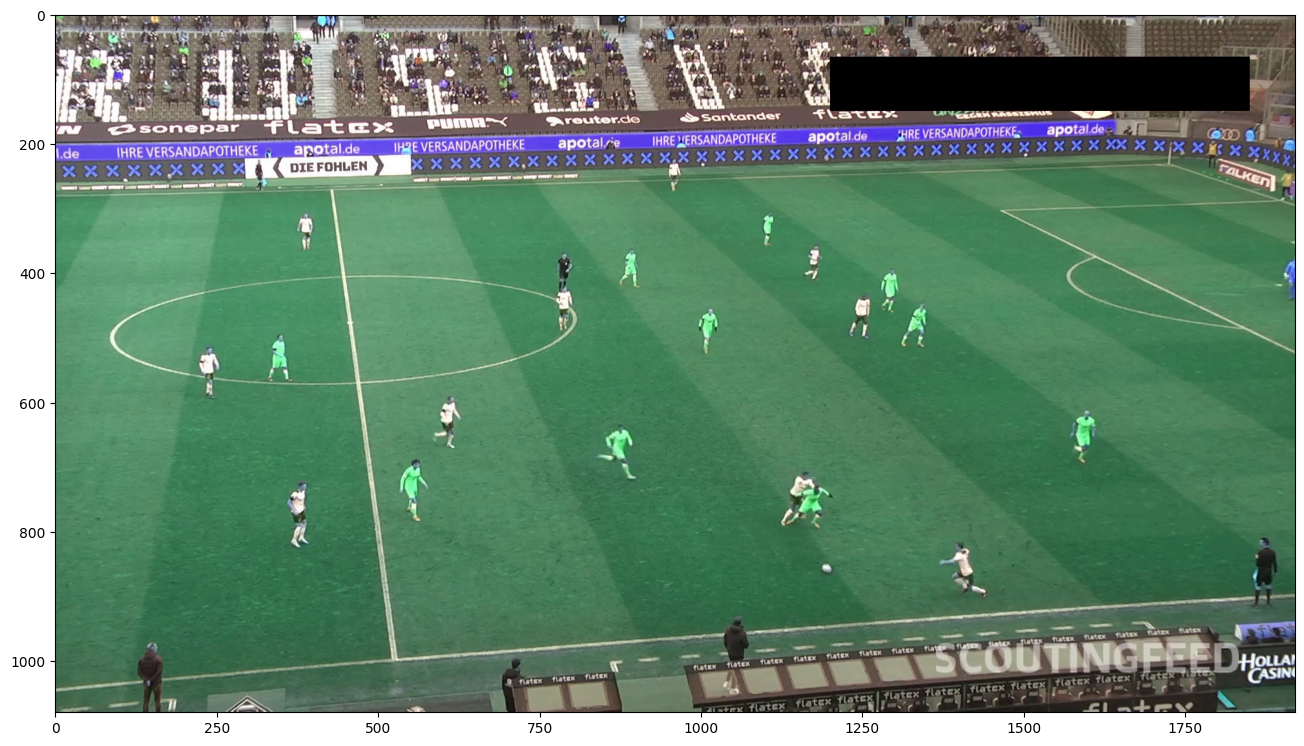

In [ ]:
frame = next(frame_iterator)
frame_plot(frame)

In [ ]:
!pwd

/content/drive/MyDrive/Football


Initializing the custom model

In [ ]:
model = torch.hub.load('ultralytics/yolov5','custom',WEIGHTS,device=0)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 416 layers, 139999708 parameters, 0 gradients, 207.9 GFLOPs
Adding AutoShape... 


In [ ]:
result = model(frame,size=1280)

In [ ]:
result.pandas()

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 1080x1920 1 ball, 1 goalkeeper, 19 players, 3 referees
Speed: 26.9ms pre-process, 190.1ms inference, 37.4ms NMS per image at shape (1, 3, 768, 1280)

In [ ]:
result.pred[0]

tensor([[5.33234e+02, 6.87570e+02, 5.78573e+02, 7.84712e+02, 9.73769e-01, 2.00000e+00],
        [3.27560e+02, 4.94221e+02, 3.67715e+02, 5.70054e+02, 9.72061e-01, 2.00000e+00],
        [1.36868e+03, 8.16015e+02, 1.44455e+03, 9.04930e+02, 9.71974e-01, 2.00000e+00],
        [1.30964e+03, 4.47144e+02, 1.35070e+03, 5.16344e+02, 9.67860e-01, 2.00000e+00],
        [1.85383e+03, 8.07013e+02, 1.89357e+03, 9.18096e+02, 9.66307e-01, 3.00000e+00],
        [8.47532e+02, 6.34075e+02, 9.00840e+02, 7.21330e+02, 9.66143e-01, 2.00000e+00],
        [2.21989e+02, 5.13461e+02, 2.55608e+02, 5.94411e+02, 9.64198e-01, 2.00000e+00],
        [1.12392e+03, 7.07760e+02, 1.18086e+03, 7.92754e+02, 9.63277e-01, 2.00000e+00],
        [9.96095e+02, 4.54108e+02, 1.02639e+03, 5.26345e+02, 9.62843e-01, 2.00000e+00],
        [1.57265e+03, 6.11327e+02, 1.61230e+03, 6.94755e+02, 9.62607e-01, 2.00000e+00],
        [1.22946e+03, 4.31551e+02, 1.26351e+03, 5.01717e+02, 9.62112e-01, 2.00000e+00],
        [8.73488e+02, 3.61339e+0

The following are the annotation classes for each image

In [ ]:
model.names

{0: 'ball', 1: 'goalkeeper', 2: 'player', 3: 'referee'}

#Installing ByteTrack

Note: while installing the requirements for ByteTrack, error encounter, onnxruntime version 1.8.0 specified in the requirementstxt not available, using onnxruntime version 1.12.0 instead

In [ ]:
%cd {CD}
!git clone https://github.com/ifzhang/ByteTrack.git

/content/drive/MyDrive/Football
fatal: destination path 'ByteTrack' already exists and is not an empty directory.


In [ ]:
!cd ByteTrack && pip3 install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 33.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.5/161.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 100.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Could not find a version that satisfies the requirement onnxruntime==1.8.0 (from versions: 1.12.0, 1.12.1, 1.13.1, 1.14.0, 1.14.1, 1.15.0, 1.15.1)
ERROR: No matching distribution found for onnxruntime==1.8.0


In [ ]:
!pip install onnxruntime==1.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 13.0 MB/s eta 0:00:00


In [ ]:
!pip install onnx-simplifier==0.3.5

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 678.1/678.1 kB 56.0 MB/s eta 0:00:00
  Created wheel for onnx-simplifier: filename=onnx_simplifier-0.3.5-py3-none-any.whl size=12852 sha256=c538194e2844aeebed2f6777466627142640edaccdf26b67ac6fc0b1dee5ed91
  Stored in directory: /root/.cache/pip/wheels/80/c8/37/3add8c73aa2604e2a17d2f8836fab2b889a931c028bfa57a33
Successfully built onnx-simplifier


In [ ]:
!pwd

/content/drive/MyDrive/Football


In [ ]:
%cd {CD}/ByteTrack

/content/drive/MyDrive/Football/ByteTrack


Note: While setting up ByteTrack, dependencies like cython_bbox,loguru,lap tend to raise an error, so pip install the modules before beginning to work on ByteTrack

In [ ]:
!python3 setup.py develop

running develop
/usr/local/lib/python3.10/dist-packages/setuptools/command/develop.py:40: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://github.com/pypa/setuptools/issues/917 for details.
        ********************************************************************************

!!
  easy_install.initialize_options(self)
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.



In [ ]:
!pip install cython_bbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 607.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for cython_bbox: filename=cython_bbox-0.1.3-cp310-cp310-linux_x86_64.whl size=62984 sha256=c0d8a265c1b0599f68626cb16ff7a8f933d8f089334a78ef3ab9a25ea09bfdc1
  Stored in directory: /root/.cache/pip/wheels/33/f2/fc/4a4b0f3870075d64eb15a38c9ecb3c3d582677ee5f2f2e8939
Successfully built cython_bbox


In [ ]:
!pip install onemetric --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.6 MB/s eta 0:00:00


In [ ]:
!pip install loguru
!pip install lap

  Using cached loguru-0.7.0-py3-none-any.whl (59 kB)
  Using cached lap-0.4.0.tar.gz (1.5 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for lap: filename=lap-0.4.0-cp310-cp310-linux_x86_64.whl size=1628964 sha256=fe9ab8a07181f3b8e923a059540d8c109f791ef0cdd58a52d40f09f64e42b8c4
  Stored in directory: /root/.cache/pip/wheels/00/42/2e/9dfe19270eea279d79e84767ff0d7b8082c3bf776cad00e83d
Successfully built lap


In [ ]:
from dataclasses import dataclass

In [ ]:
@dataclass(frozen=True)
class BYTETrackerArgs:
  track_thresh: float = 0.25
  track_buffer: int = 35
  match_thresh: float = 0.8
  aspect_ratio_thresh: float = 3.0
  min_box_area: float = 1.0
  mot20: bool = False

In [ ]:
from yolox.tracker.byte_tracker import BYTETracker,STrack
from onemetric.cv.utils.iou import box_iou_batch

In [ ]:
from __future__ import annotations
from dataclasses import dataclass, field
from typing import Tuple, Optional, List, Dict, Any

# Classes to define the Bounding boxes,Co-ordinates and so on

In [ ]:
import cv2
import numpy as np

Defining a 2-D point class of X and Y coordinates

In [ ]:
@dataclass(frozen=True)
class Point:
    x: float
    y: float

    @property
    def int_xy_tuple(self) -> Tuple[int, int]:
        return int(self.x), int(self.y)

Defining a Rectangle bound class- This has various properties like minimum X, minimum Y, maximum X, maximum Y, top left coordinate, bottom right coordinate, top center, bottom center, center and padding. These are used to define various points on a rectangle during the detection phase. and finally a method to determine if a given rectangle contains the point or not

In [ ]:
@dataclass(frozen=True)
class Rect:
    x: float
    y: float
    width: float
    height: float

    @property
    def min_x(self) -> float:
        return self.x

    @property
    def min_y(self) -> float:
        return self.y

    @property
    def max_x(self) -> float:
        return self.x + self.width

    @property
    def max_y(self) -> float:
        return self.y + self.height

    @property
    def top_left(self) -> Point:
        return Point(x=self.x, y=self.y)

    @property
    def bottom_right(self) -> Point:
        return Point(x=self.x + self.width, y=self.y + self.height)

    @property
    def bottom_center(self) -> Point:
        return Point(x=self.x + self.width / 2, y=self.y + self.height)

    @property
    def top_center(self) -> Point:
        return Point(x=self.x + self.width / 2, y=self.y)

    @property
    def center(self) -> Point:
        return Point(x=self.x + self.width / 2, y=self.y + self.height / 2)

    def pad(self, padding: float) -> Rect:
        return Rect(
            x=self.x - padding,
            y=self.y - padding,
            width=self.width + 2*padding,
            height=self.height + 2*padding
        )

    def contains_point(self, point: Point) -> bool:
        return self.min_x < point.x < self.max_x and self.min_y < point.y < self.max_y

Detection Utilities: represent the detected region of the image. from_results method takes an array of predictions(pred) and a dictionary of classe names as input. filter_detections_by_class method returns a list of detections filtered by class name

In [ ]:
@dataclass
class Detection:
    rect: Rect
    class_id: int
    class_name: str
    confidence: float
    tracker_id: Optional[int] = None

    @classmethod
    def from_results(cls, pred: np.ndarray, names: Dict[int, str]) -> List[Detection]:
        result = []
        for x_min, y_min, x_max, y_max, confidence, class_id in pred:
            class_id=int(class_id)
            result.append(Detection(
                rect=Rect(
                    x=float(x_min),
                    y=float(y_min),
                    width=float(x_max - x_min),
                    height=float(y_max - y_min)
                ),
                class_id=class_id,
                class_name=names[class_id],
                confidence=float(confidence)
            ))
        return result


def filter_detections_by_class(detections: List[Detection], class_name: str) -> List[Detection]:
    return [
        detection
        for detection
        in detections
        if detection.class_name == class_name
    ]

Drawing Utilities:

Color class to identify the colors used

In [ ]:
@dataclass(frozen=True)
class Color:
    r: int
    g: int
    b: int

    @property
    def bgr_tuple(self) -> Tuple[int, int, int]:
        return self.b, self.g, self.r

    @classmethod
    def from_hex_string(cls, hex_string: str) -> Color:
        r, g, b = tuple(int(hex_string[1 + i:1 + i + 2], 16) for i in (0, 2, 4))
        return Color(r=r, g=g, b=b)

draw_rect and draw_filled_rect are used to draw rectangles with or without fill

In [ ]:
def draw_rect(image: np.ndarray, rect: Rect, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.rectangle(image, rect.top_left.int_xy_tuple, rect.bottom_right.int_xy_tuple, color.bgr_tuple, thickness)
    return image


def draw_filled_rect(image: np.ndarray, rect: Rect, color: Color) -> np.ndarray:
    cv2.rectangle(image, rect.top_left.int_xy_tuple, rect.bottom_right.int_xy_tuple, color.bgr_tuple, -1)
    return image

draw_polygon and draw_filled_polygon draw a polygon with or without fill

In [ ]:
def draw_polygon(image: np.ndarray, countour: np.ndarray, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.drawContours(image, [countour], 0, color.bgr_tuple, thickness)
    return image


def draw_filled_polygon(image: np.ndarray, countour: np.ndarray, color: Color) -> np.ndarray:
    cv2.drawContours(image, [countour], 0, color.bgr_tuple, -1)
    return image

draw_text puts text on the image

In [ ]:
def draw_text(image: np.ndarray, anchor: Point, text: str, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.putText(image, text, anchor.int_xy_tuple, cv2.FONT_HERSHEY_SIMPLEX, 0.4, color.bgr_tuple, thickness, 2, False)
    return image

draw_ellipse draws an ellipse at the base of the detected region by making use of the bottom-center

In [ ]:
def draw_ellipse(image: np.ndarray, rect: Rect, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.ellipse(
        image,
        center=rect.bottom_center.int_xy_tuple,
        axes=(int(rect.width), int(0.35 * rect.width)),
        angle=0.0,
        startAngle=-45,
        endAngle=235,
        color=color.bgr_tuple,
        thickness=thickness,
        lineType=cv2.LINE_4
    )
    return image

base_annotator finally returns the proper annotated image

In [ ]:
@dataclass
class BaseAnnotator:
    colors: List[Color]
    thickness: int

    def annotate(self, image: np.ndarray, detections: List[Detection]) -> np.ndarray:
        annotated_image = image.copy()
        for detection in detections:
            annotated_image = draw_ellipse(
                image=image,
                rect=detection.rect,
                color=self.colors[detection.class_id],
                thickness=self.thickness
            )
        return annotated_image

Now, the colors to be used for each class are specified

In [ ]:
# white
BALLCOLOR = "#FFFFFF"
BALL_COLOR = Color.from_hex_string(BALLCOLOR)

# black
GK_COLOR = "#000000"
GOALKEEPER_COLOR = Color.from_hex_string(GK_COLOR)

# green
PLAYER = "#00D4BB"
PLAYER_COLOR = Color.from_hex_string(PLAYER)

# red
REFEREE = "#850101"
REFEREE_COLOR = Color.from_hex_string(REFEREE)

COLORS = [
    BALL_COLOR,
    GOALKEEPER_COLOR,
    PLAYER_COLOR,
    REFEREE_COLOR
]
THICKNESS = 3

Now, we can initialize the detection

In [ ]:
#%cd /content/drive/MyDrive/Football
import matplotlib.pyplot as plt


%matplotlib inline

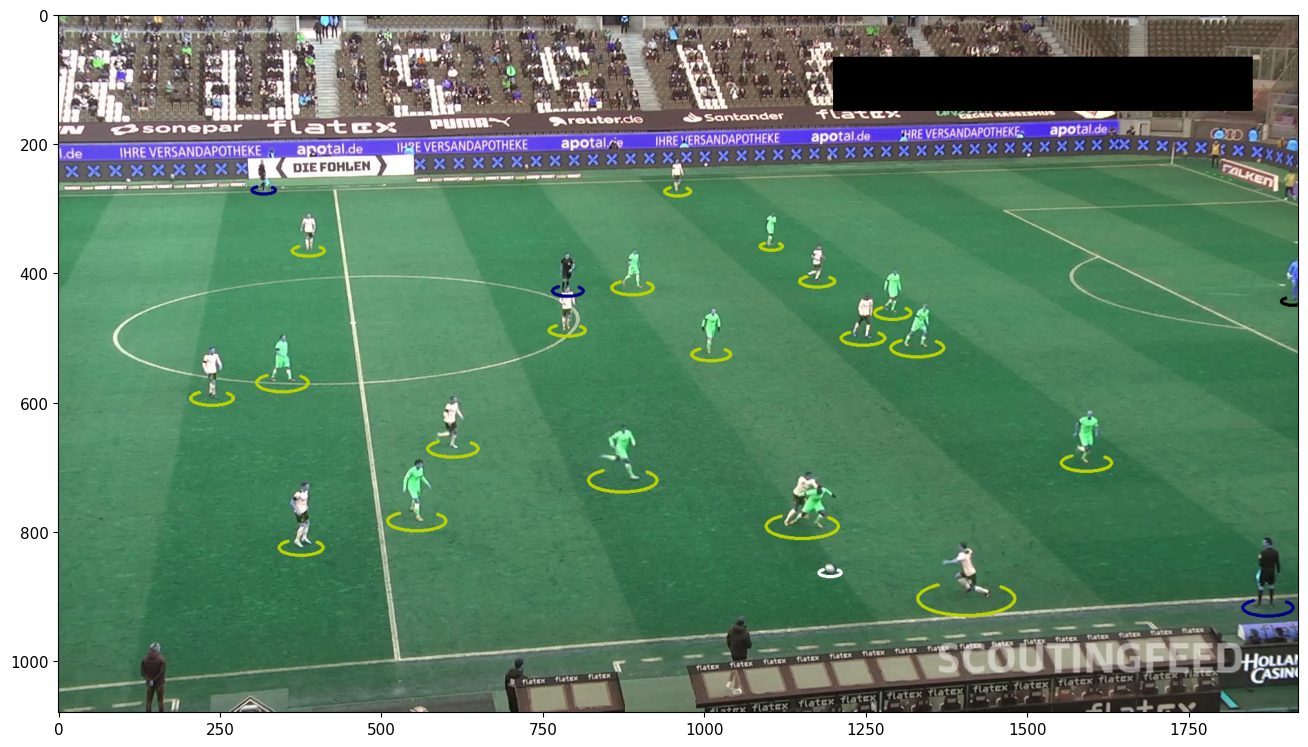

In [ ]:
frame_iterator = iter(frame_create(video_file=f"{CD}/clips/08fd33_4.mp4"))

annotator = BaseAnnotator(
    colors=COLORS,
    thickness=THICKNESS)

frame = next(frame_iterator)

results = model(frame, size=1280)
detections = Detection.from_results(
    pred=results.pred[0].cpu().numpy(),
    names=model.names)

annotated_image = annotator.annotate(
    image=frame,
    detections=detections)

frame_plot(annotated_image)

Here is the result of the annotating process

In [ ]:
!pwd

/content/drive/MyDrive/Football/ByteTrack


Now, we define the colours to be used to mark the ball and the player in possession

In [ ]:
# black
MARKER_CONTOUR_COLOR_HEX = "000000"
MARKER_CONTOUR_COLOR = Color.from_hex_string(MARKER_CONTOUR_COLOR_HEX)

# red
PLAYER_MARKER_FILL_COLOR_HEX = "FF0000"
PLAYER_MARKER_FILL_COLOR = Color.from_hex_string(PLAYER_MARKER_FILL_COLOR_HEX)

# green
BALL_MERKER_FILL_COLOR_HEX = "00FF00"
BALL_MARKER_FILL_COLOR = Color.from_hex_string(BALL_MERKER_FILL_COLOR_HEX)

MARKER_CONTOUR_THICKNESS = 2
MARKER_WIDTH = 20
MARKER_HEIGHT = 20
MARKER_MARGIN = 10

# distance in pixels from the player's bounding box where we consider the ball is in his possession
PLAYER_IN_POSSESSION_PROXIMITY = 30

In [ ]:
from typing import List
import numpy as np

Function to calculate the coordinates of a marker

In [ ]:
def calculate_marker(anchor: Point) -> np.ndarray:
    x, y = anchor.int_xy_tuple
    return(np.array([
        [x - MARKER_WIDTH // 2, y - MARKER_HEIGHT - MARKER_MARGIN],
        [x, y - MARKER_MARGIN],
        [x + MARKER_WIDTH // 2, y - MARKER_HEIGHT - MARKER_MARGIN]
    ]))

Function to draw a marker

In [ ]:
def draw_marker(image: np.ndarray, anchor: Point, color: Color) -> np.ndarray:
    possession_marker_countour = calculate_marker(anchor=anchor)
    image = draw_filled_polygon(
        image=image,
        countour=possession_marker_countour,
        color=color)
    image = draw_polygon(
        image=image,
        countour=possession_marker_countour,
        color=MARKER_CONTOUR_COLOR,
        thickness=MARKER_CONTOUR_THICKNESS)
    return image

Now, the marker annotation

In [ ]:
@dataclass
class MarkerAnntator:

    color: Color

    def annotate(self, image: np.ndarray, detections: List[Detection]) -> np.ndarray:
        annotated_image = image.copy()
        for detection in detections:
            annotated_image = draw_marker(
                image=image,
                anchor=detection.rect.top_center,
                color=self.color)
        return annotated_image

In [ ]:
from typing import List,Optional

Function to determine the player in possession of the ball

In [ ]:
def get_player_in_possession(
    player_detections: List[Detection],
    ball_detections: List[Detection],
    proximity: int
) -> Optional[Detection]:
    if len(ball_detections) != 1:
        return None
    ball_detection = ball_detections[0]
    for player_detection in player_detections:
        if player_detection.rect.pad(proximity).contains_point(point=ball_detection.rect.center):
            return player_detection

Initialize the marker annotators...

In [ ]:
ball_marker = MarkerAnntator(color=BALL_MARKER_FILL_COLOR)
player_marker = MarkerAnntator(color=PLAYER_MARKER_FILL_COLOR)

Obtain a frame from a clip....

In [ ]:
frame = next(frame_iterator)

Do the detections of the classes....

In [ ]:
results = model(frame, size=1280)
detections = Detection.from_results(
    pred=results.pred[0].cpu().numpy(),
    names=model.names)

In [ ]:
ball_detections = filter_detections_by_class(detections=detections, class_name="ball")
player_detections = filter_detections_by_class(detections=detections, class_name="player")
player_in_possession_detection = get_player_in_possession(
    player_detections=player_detections,
    ball_detections=ball_detections,
    proximity=PLAYER_IN_POSSESSION_PROXIMITY)

...and annotate the image

In [ ]:
annotated_image = frame.copy()
annotated_image = ball_marker.annotate(
    image=annotated_image,
    detections=ball_detections)
annotated_image = player_marker.annotate(
    image=annotated_image,
    detections=[player_in_possession_detection] if player_in_possession_detection else [])

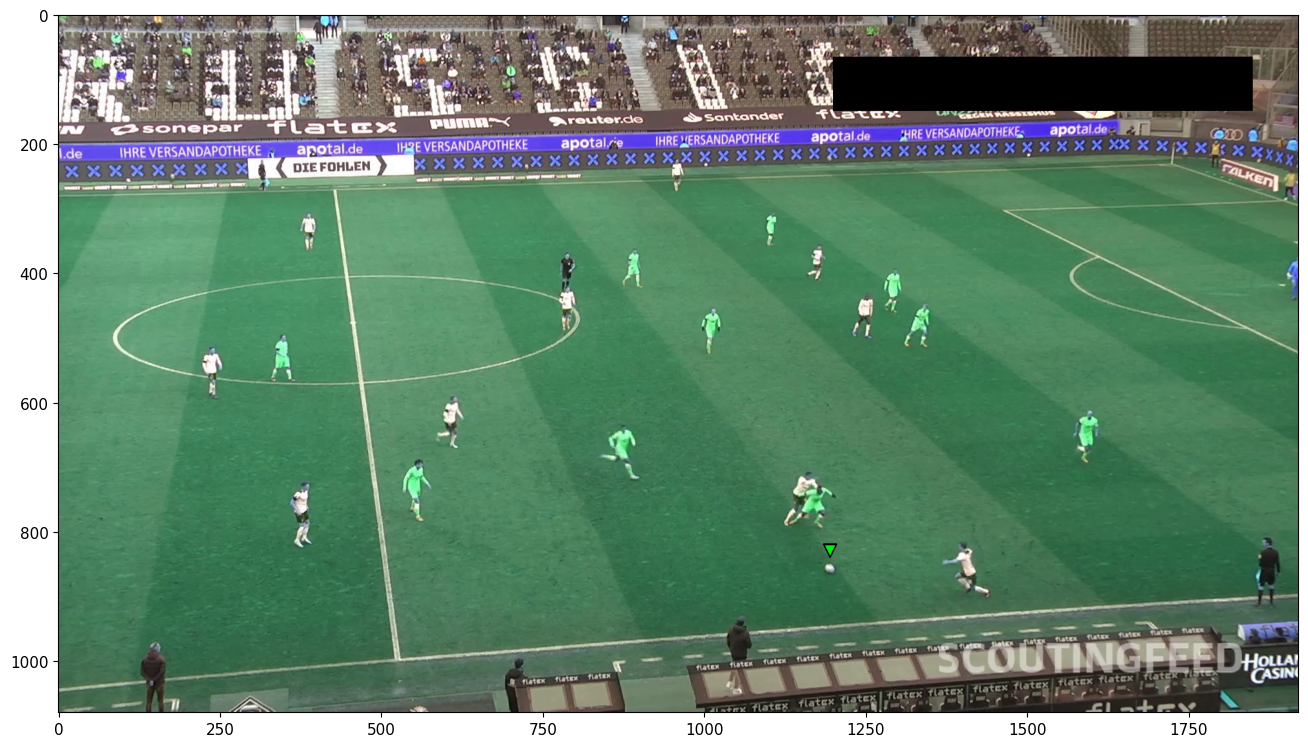

In [ ]:
frame_plot(annotated_image)

The result of the marker annotation process
Since no player is in proximity of the ball, the player marker isn't available in this frame

In [ ]:
SOURCE_VIDEO = f"{CD}/clips/08fd33_4.mp4"
TARGET_VIDEO = f"{CD}/ball-possession/8fd33_4.mp4"

In [ ]:
from dataclasses import dataclass
import cv2

In [ ]:
@dataclass(frozen=True)
class VideoConfig:
    fps: float
    width: int
    height: int

Function to generate a video of all the annotated frames

In [ ]:
def get_video_writer(target_video_path: str, video_config: VideoConfig) -> cv2.VideoWriter:
    video_target_dir = os.path.dirname(os.path.abspath(target_video_path))
    os.makedirs(video_target_dir, exist_ok=True)
    return cv2.VideoWriter(
        target_video_path,
        fourcc=cv2.VideoWriter_fourcc(*"mp4v"),
        fps=video_config.fps,
        frameSize=(video_config.width, video_config.height),
        isColor=True
    )

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
video_config = VideoConfig(
    fps=30,
    width=1920,
    height=1080)
video_writer = get_video_writer(
    target_video_path=TARGET_VIDEO,
    video_config=video_config)

In [ ]:
frame_iterator = iter(frame_create(video_file=SOURCE_VIDEO))

In [ ]:
ball_marker = MarkerAnntator(color=BALL_MARKER_FILL_COLOR)
player_marker = MarkerAnntator(color=PLAYER_MARKER_FILL_COLOR)

Test run to obtain an annotated video

In [ ]:
for frame in tqdm(frame_iterator, total=750):

    # run detector
    results = model(frame, size=1280)
    detections = Detection.from_results(
        pred=results.pred[0].cpu().numpy(),
        names=model.names)

    # postprocess results
    ball_detections = filter_detections_by_class(detections=detections, class_name="ball")
    goalkeeper_detections = filter_detections_by_class(detections=detections, class_name="goalkeeper")
    player_detections = filter_detections_by_class(detections=detections, class_name="player") + goalkeeper_detections
    player_in_possession_detection = get_player_in_possession(
        player_detections=player_detections,
        ball_detections=ball_detections,
        proximity=PLAYER_IN_POSSESSION_PROXIMITY)

    # annotate video frame
    annotated_image = frame.copy()
    annotated_image = ball_marker.annotate(
        image=annotated_image,
        detections=ball_detections)
    annotated_image = player_marker.annotate(
        image=annotated_image,
        detections=[player_in_possession_detection] if player_in_possession_detection else [])

    # save video frame
    video_writer.write(annotated_image)

video_writer.release()

  0%|          | 0/750 [00:00<?, ?it/s]

#ByteTrack Initialization

In [ ]:
from typing import List
import numpy as np

Function to convert all detections made into bounding boxes

In [ ]:
def detections2boxes(detections: List[Detection], with_confidence: bool = True) -> np.ndarray:
    return np.array([
        [
            detection.rect.top_left.x,
            detection.rect.top_left.y,
            detection.rect.bottom_right.x,
            detection.rect.bottom_right.y,
            detection.confidence
        ] if with_confidence else [
            detection.rect.top_left.x,
            detection.rect.top_left.y,
            detection.rect.bottom_right.x,
            detection.rect.bottom_right.y
        ]
        for detection
        in detections
    ], dtype=float)

Function to convert the STrack objects to bounding boxes

In [ ]:
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)

In [ ]:
def detections_with_tracks(
    detections: List[Detection],
    tracks: List[STrack]
) -> List[Detection]:
    detection_boxes = detections2boxes(detections=detections, with_confidence=False)
    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detection_boxes)
    track2detection = np.argmax(iou, axis=1)

    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            detections[detection_index].tracker_id = tracks[tracker_index].track_id
    return detections

Data class to annotate the text onto the frames

In [ ]:
@dataclass
class TextAnnotator:
    background_color: Color
    text_color: Color
    text_thickness: int

    def annotate(self, image: np.ndarray, detections: List[Detection]) -> np.ndarray:
        annotated_image = image.copy()
        for detection in detections:
            # if tracker_id is not assigned skip annotation
            if detection.tracker_id is None:
                continue

            # calculate text dimensions
            size, _ = cv2.getTextSize(
                str(detection.tracker_id),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.4,
                thickness=self.text_thickness)
            width, height = size

            # calculate text background position
            center_x, center_y = detection.rect.bottom_center.int_xy_tuple
            x = center_x - width // 2
            y = center_y - height // 2 + 10

            # draw background
            annotated_image = draw_filled_rect(
                image=annotated_image,
                rect=Rect(x=x, y=y, width=width, height=height).pad(padding=5),
                color=self.background_color)

            # draw text
            annotated_image = draw_text(
                image=annotated_image,
                anchor=Point(x=x, y=y + height),
                text=str(detection.tracker_id),
                color=self.text_color,
                thickness=self.text_thickness)
        return annotated_image

source and target directories specified

In [ ]:
SOURCE_VIDEO = f"{CD}/clips/08fd33_4.mp4"
TARGET_VIDEO = f"{CD}/tracking/8fd33_4.mp4"

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
video_config = VideoConfig(
    fps=30,
    width=1920,
    height=1080)
video_writer = get_video_writer(
    target_video_path=TARGET_VIDEO,
    video_config=video_config)

In [ ]:
frame_iterator = iter(frame_create(video_file=SOURCE_VIDEO))

In [ ]:
text_annotator = TextAnnotator(background_color=Color(255, 255, 255), text_color=Color(0, 0, 0), text_thickness=2)

ByteTrack initialised

In [ ]:
byte_tracker = BYTETracker(BYTETrackerArgs())

ID annotation process

In [ ]:
for frame in tqdm(frame_iterator, total=750):

    # run detector
    results = model(frame, size=1280)
    detections = Detection.from_results(
        pred=results.pred[0].cpu().numpy(),
        names=model.names)

    # postprocess results
    goalkeeper_detections = filter_detections_by_class(detections=detections, class_name="goalkeeper")
    player_detections = filter_detections_by_class(detections=detections, class_name="player")
    player_detections = player_detections + goalkeeper_detections

    # track players
    tracks = byte_tracker.update(
        output_results=detections2boxes(detections=player_detections),
        img_info=frame.shape,
        img_size=frame.shape
    )
    player_detections = detections_with_tracks(detections=player_detections, tracks=tracks)

    # annotate video frame
    annotated_image = frame.copy()
    annotated_image = text_annotator.annotate(
        image=annotated_image,
        detections=player_detections)

    # save video frame
    video_writer.write(annotated_image)

# close output video
video_writer.release()

  0%|          | 0/750 [00:00<?, ?it/s]

#Combining all the functions

Source and target directories for the videos specified

In [ ]:
SOURCE_VIDEO = f"{CD}/clips/08fd33_6.mp4"
TARGET_VIDEO = f"{CD}/final/08fd33_6.mp4"

In [ ]:
from tqdm.notebook import tqdm

Video Configuration

In [ ]:
video_config = VideoConfig(
    fps=30,
    width=1920,
    height=1080)
video_writer = get_video_writer(
    target_video_path=TARGET_VIDEO,
    video_config=video_config)

Frame creation/generation

In [ ]:
frame_iterator = iter(frame_create(video_file=SOURCE_VIDEO))

Base annotation(ellipse)

In [ ]:
base_annotator = BaseAnnotator(
    colors=[
        BALL_COLOR,
        PLAYER_COLOR,
        PLAYER_COLOR,
        REFEREE_COLOR
    ],
    thickness=THICKNESS)

Text annotation

In [ ]:
player_goalkeeper_text_annotator = TextAnnotator(
    PLAYER_COLOR, text_color=Color(255, 255, 255), text_thickness=2)
referee_text_annotator = TextAnnotator(
    REFEREE_COLOR, text_color=Color(0, 0, 0), text_thickness=2)

Marker annotation

In [ ]:
ball_marker_annotator = MarkerAnntator(
    color=BALL_MARKER_FILL_COLOR)
player_in_possession_marker_annotator = MarkerAnntator(
    color=PLAYER_MARKER_FILL_COLOR)

ByteTrack initialising

In [ ]:
byte_tracker = BYTETracker(BYTETrackerArgs())

Generating the video

In [ ]:
for frame in tqdm(frame_iterator, total=750):

    # run detector
    results = model(frame, size=1280)
    detections = Detection.from_results(
        pred=results.pred[0].cpu().numpy(),
        names=model.names)

    # filter detections by class
    ball_detections = filter_detections_by_class(detections=detections, class_name="ball")
    referee_detections = filter_detections_by_class(detections=detections, class_name="referee")
    goalkeeper_detections = filter_detections_by_class(detections=detections, class_name="goalkeeper")
    player_detections = filter_detections_by_class(detections=detections, class_name="player")

    player_goalkeeper_detections = player_detections + goalkeeper_detections
    tracked_detections = player_detections + goalkeeper_detections + referee_detections

    # calculate player in possession
    player_in_possession_detection = get_player_in_possession(
        player_detections=player_goalkeeper_detections,
        ball_detections=ball_detections,
        proximity=PLAYER_IN_POSSESSION_PROXIMITY)

    # track
    tracks = byte_tracker.update(
        output_results=detections2boxes(detections=tracked_detections),
        img_info=frame.shape,
        img_size=frame.shape
    )
    tracked_detections = detections_with_tracks(detections=tracked_detections, tracks=tracks)

    tracked_referee_detections = filter_detections_by_class(detections=tracked_detections, class_name="referee")
    tracked_goalkeeper_detections = filter_detections_by_class(detections=tracked_detections, class_name="goalkeeper")
    tracked_player_detections = filter_detections_by_class(detections=tracked_detections, class_name="player")

    # annotate video frame
    annotated_image = frame.copy()
    annotated_image = base_annotator.annotate(
        image=annotated_image,
        detections=tracked_detections)

    annotated_image = player_goalkeeper_text_annotator.annotate(
        image=annotated_image,
        detections=tracked_goalkeeper_detections + tracked_player_detections)
    annotated_image = referee_text_annotator.annotate(
        image=annotated_image,
        detections=tracked_referee_detections)

    annotated_image = ball_marker_annotator.annotate(
        image=annotated_image,
        detections=ball_detections)
    annotated_image = player_in_possession_marker_annotator.annotate(
        image=annotated_image,
        detections=[player_in_possession_detection] if player_in_possession_detection else [])

    # save video frame
    video_writer.write(annotated_image)

# close output video
video_writer.release()

  0%|          | 0/750 [00:00<?, ?it/s]